# Car Classification

Our **aim** is to classify Cars based on their features. So, it is a multi-class classification problem where each instance (car) is classified into one of the predefined classes based on its attributes.


**Attributes:** The dataset consists of six categorical attributes, and each attribute has a defined set of categories. These attributes are:

*Buying:* The buying price of the car. Categories are very low, low, medium, and high.
*Maint:* The maintenance cost of the car. Categories are very low, low, medium, and high.
*Doors:* The number of doors. Categories are 2, 3, 4, or more than 5.
*Persons:* The capacity in terms of persons to carry. Categories are 2, 4, or more.
*Lug_boot:* The size of the luggage boot. Categories are small, medium, and large.
*Safety:* The estimated safety of the car. Categories are low, medium, and high.

**Class Label:** The class label indicates the overall evaluation of the car.

The possible classes are:

1. Unacc: Unacceptable
2. Acc: Acceptable
3. Good: Good
4. Vgood: Very Good

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score

file_address = "D://PYTHON_Files/car_evaluation.csv"
car_df = pd.read_csv(file_address)
car_df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [90]:
print(f"Shape of Dataset is: {car_df.shape}")
print(f"Numeric or Object??? ---> {car_df['maint'].dtype}")

Shape of Dataset is: (1728, 7)
Numeric or Object??? ---> object


buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


<Axes: xlabel='class'>

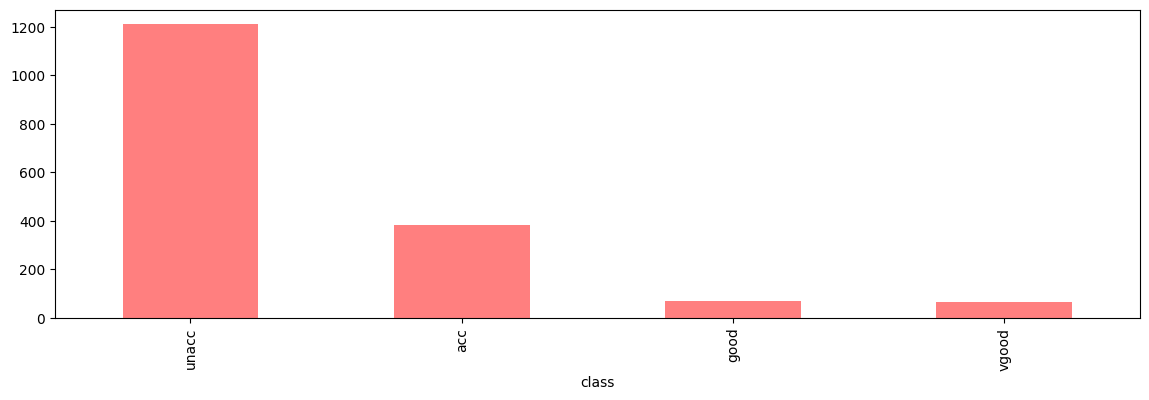

In [ ]:
print(car_df['buying'].value_counts())
car_df['class'].value_counts().plot(kind='bar', color = 'r', figsize=(14, 4), alpha=0.5)

# Encoding!
**it does entail encoding (convert to numeric values instead of categorical, pandas calls "object")**

In [30]:
LE = LabelEncoder()
encoded_df_car = car_df.apply(lambda x: LE.fit_transform(x) if x.dtype == 'object' else x)
encoded_df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


# How to decode?

In [32]:
dict(zip(encoded_df_car['buying'], LE.inverse_transform(encoded_df_car['buying'])))

{3: 'vgood', 0: 'acc', 2: 'unacc', 1: 'good'}

# Forming our dataset

In [33]:
X = encoded_df_car.drop('class', axis=1)
y = encoded_df_car['class']
Xtr, Xte, Ytr, Yte = train_test_split(X, y, train_size=0.8)
print(f"Xtr = {Xtr.shape}\nXte = {Xte.shape}\nYtr = {Ytr.shape}\nYte = {Yte.shape}")

Xtr = (1382, 6)
Xte = (346, 6)
Ytr = (1382,)
Yte = (346,)


# Building our Multi-layer Perceptron Model (MLP Classifier) 

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(500), activation='relu', solver='adam',
                     batch_size=16, max_iter=500, validation_fraction=0.2,
                     early_stopping = True, verbose=True)
mlp.fit(Xtr, Ytr)
y_pred = mlp.predict(Xte)
res = np.column_stack((Yte, y_pred))
res_df = pd.DataFrame(res)
res_df

Iteration 1, loss = 0.81434160
Validation score: 0.667870
Iteration 2, loss = 0.66483351
Validation score: 0.693141
Iteration 3, loss = 0.62187905
Validation score: 0.685921
Iteration 4, loss = 0.57455876
Validation score: 0.725632
Iteration 5, loss = 0.53469441
Validation score: 0.740072
Iteration 6, loss = 0.48644033
Validation score: 0.768953
Iteration 7, loss = 0.44801638
Validation score: 0.765343
Iteration 8, loss = 0.41753801
Validation score: 0.826715
Iteration 9, loss = 0.39669176
Validation score: 0.819495
Iteration 10, loss = 0.35419378
Validation score: 0.826715
Iteration 11, loss = 0.33713797
Validation score: 0.833935
Iteration 12, loss = 0.31671058
Validation score: 0.790614
Iteration 13, loss = 0.30889705
Validation score: 0.848375
Iteration 14, loss = 0.28853092
Validation score: 0.851986
Iteration 15, loss = 0.29221860
Validation score: 0.787004
Iteration 16, loss = 0.26485015
Validation score: 0.837545
Iteration 17, loss = 0.24708618
Validation score: 0.841155
Iterat

,0,1
0,2,2
1,2,2
2,0,0
3,2,2
4,2,2
...,...,...
341,2,2
342,2,2
343,3,3
344,0,0


# Post-processing

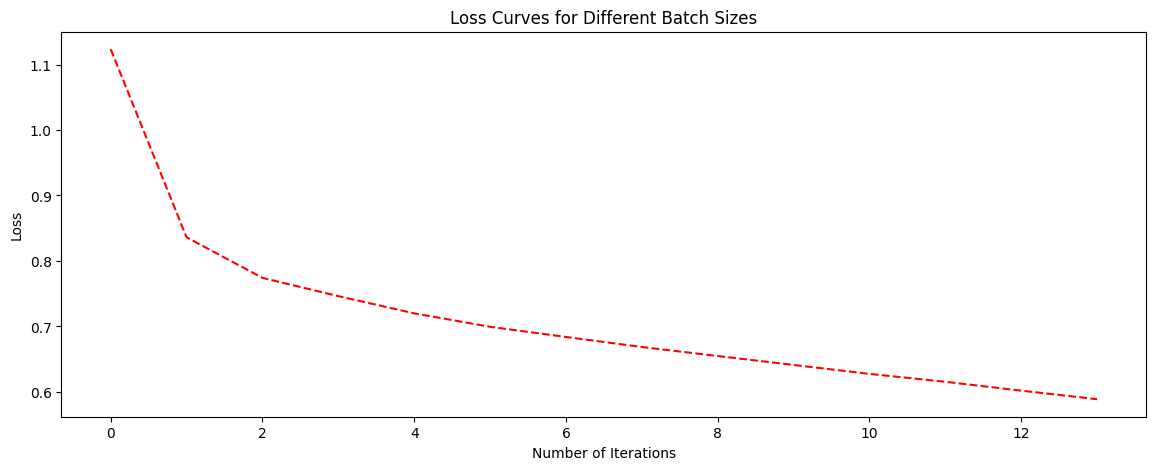

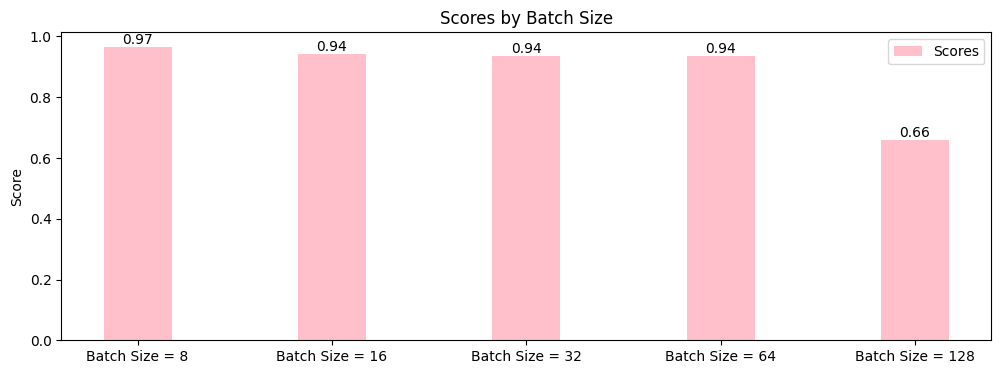

In [ ]:
log = {'Loss' : mlp.loss_curve_}
score_log = []
batch_sizes = [8, 16, 32, 64, 128]

for bs in batch_sizes:
    mlp.batch_size = bs
    mlp.verbose = False
    mlp.fit(Xtr, Ytr)
    score_log.append(mlp.score(Xte, Yte))
plt.figure(figsize=(14, 5))
plt.plot(range(len(log['Loss'])), log['Loss'], linestyle='--', c = 'r', label = 'Loss')
plt.title("Loss Curves for Different Batch Sizes")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")


# Sensitivity Analysis
plt.figure(figsize=(12, 4))
bar_width = 0.35  
bar_positions = np.arange(len(batch_sizes))
plt.bar(bar_positions, score_log, width=bar_width, color='pink', label='Scores')
plt.xticks(bar_positions, [f"Batch Size = {bs}" for bs in batch_sizes])
plt.ylabel("Score")
plt.title("Scores by Batch Size")
for i, score in enumerate(score_log):
    plt.text(i, score + 0.0001, f'{score:.2f}', ha='center', va='bottom')
plt.legend()
plt.show()

# Model's Performance

In [66]:
print(f"From {res_df.shape[0]} testset, {sum(res_df.loc[:, 0].values != res_df.loc[:, 1].values)} are incorrectly classified!")
probabilities = mlp.predict_proba(Xte)
auc_ovr = roc_auc_score(Yte, probabilities, multi_class="ovr", average="macro")
auc_ovo = roc_auc_score(Yte, probabilities, multi_class="ovo", average="macro")
print(f"ROC AUC Score (OvR): {auc_ovr:.4f}")
print(f"ROC AUC Score (OvO): {auc_ovo:.4f}")
print("="*60)
print(classification_report(Yte, y_pred))

From 346 testset, 19 are incorrectly classified!
ROC AUC Score (OvR): 0.9935
ROC AUC Score (OvO): 0.9843
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        71
           1       0.81      0.76      0.79        17
           2       0.97      0.97      0.97       239
           3       1.00      0.89      0.94        19

    accuracy                           0.95       346
   macro avg       0.91      0.89      0.90       346
weighted avg       0.95      0.95      0.95       346



# Probability of classification

In [59]:
for a, b in zip(y_pred, np.round(mlp.predict_proba(Xte)[:, :], 2)):
    print("MLP decides to classified %s , because its probability ( %s )  is highest among %s " % (np.round(a,2), b.max(), np.round(b, 2)))

MLP decides to classified 2 , because its probability ( 0.92 )  is highest among [0.08 0.   0.92 0.  ] 
MLP decides to classified 2 , because its probability ( 1.0 )  is highest among [0. 0. 1. 0.] 
MLP decides to classified 0 , because its probability ( 0.56 )  is highest among [0.56 0.   0.44 0.  ] 
MLP decides to classified 2 , because its probability ( 1.0 )  is highest among [0. 0. 1. 0.] 
MLP decides to classified 2 , because its probability ( 0.95 )  is highest among [0.05 0.   0.95 0.  ] 
MLP decides to classified 2 , because its probability ( 1.0 )  is highest among [0. 0. 1. 0.] 
MLP decides to classified 2 , because its probability ( 1.0 )  is highest among [0. 0. 1. 0.] 
MLP decides to classified 2 , because its probability ( 0.92 )  is highest among [0.08 0.   0.92 0.  ] 
MLP decides to classified 0 , because its probability ( 0.92 )  is highest among [0.92 0.   0.08 0.  ] 
MLP decides to classified 0 , because its probability ( 0.9 )  is highest among [0.9  0.02 0.09 0.  